In [1]:
#Illustration of K-means by example
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline

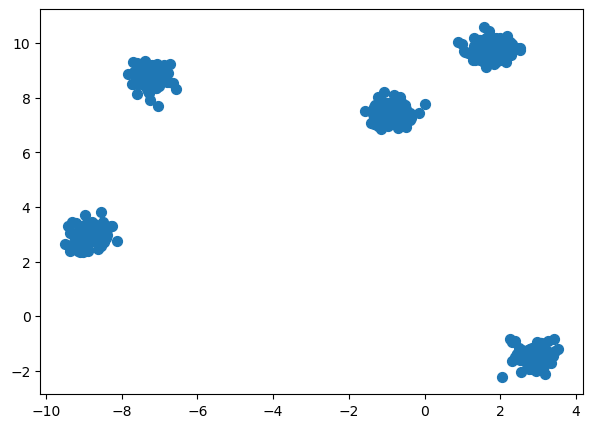

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.3)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50);

In [55]:
#X= np.array([[1,1.09730308441996],[2,2.43586442272545],[3,2.51116299518401],[4,3.03145539594202],[5,4.66664558877809],[6,3.93408456237042],[7,4.24949659312207],[8,6.20150698271801],[9,6.0717780921866],[10,6.26207315055509],[11,6.49586031797784],[12,7.83670100450654],[13,7.90940408673268],[14,7.64469311768879],[15,8.89462008041086],[16,9.78581223975706],[17,10.4556971391132],[18,9.96049095897342],[19,11.1624287278672],[20,10.4761409095033],[1,1.49645352156891],[2,0.386184701314561],[3,0.342639809355713],[4,-1.05240216629817],[5,-0.701740034637582],[6,-1.80026023417071],[7,-2.65310956496503],[8,-2.22901684720051],[9,-3.89566166009949],[10,-3.01016219363794],[11,-3.94613234180612],[12,-3.8858810837492],[13,-5.33174700485745],[14,-5.80441119639406],[15,-7.08279750222182],[16,-5.82853344603204],[17,-7.15756850228727],[18,-6.87082516687969],[19,-7.59311859408972],[20,-8.78511708923856],[1,3.77667823156857],[2,6.0743178686243],[3,6.76144670933566],[4,9.0193124434231],[5,10.7433356695474],[6,13.7056797616544],[7,16.2995356695637],[8,16.9272746711059],[9,19.1843689223608],[10,21.9390370354661],[11,24.2768927653876],[12,26.5418178220348],[13,27.2271960416962],[14,28.696383257999],[15,31.1041398803967],[16,34.1897421296044],[17,35.6038191352245],[18,37.2067736609178],[19,39.4470247254049],[20,42.1623526714938],[1,-0.664424941363579],[2,-1.78385945533055],[3,-4.84248894780797],[4,-7.18983262066937],[5,-7.61612120451894],[6,-11.4509236493259],[7,-11.9746140324827],[8,-14.2595170068448],[9,-16.9500700011744],[10,-18.3340175444392],[11,-21.4146247097464],[12,-22.8957674212245],[13,-25.2454461975581],[14,-27.5977188400436],[15,-29.1505799048792],[16,-29.5133464245803],[17,-32.4484765820864],[18,-35.3814788479149],[19,-36.1894299953562],[20,-38.118746586956]])
#X

In [4]:
X = np.array([[-8.53663266,  3.01920803],
       [ 2.51245087,  9.81706578],
       [-7.49445275,  9.04170634],
       [-7.4807815 ,  9.07578061],
       [-1.0359508 ,  7.53648501],
       [ 3.42144532, -1.31238653],
       [ 3.32565164, -1.3987458 ],
       [-1.09505425,  7.09677079],
       [-8.4701032 ,  2.72302389],
       [-1.14274729,  7.43185848],
       [-6.86827148,  9.18711543],
       [ 1.5548724 ,  9.32006438],
       [ 2.30812309,  9.97614843],
       [ 2.52342813, -1.62087215],
       [-1.35849483,  7.40073247],
       [-8.51876207,  2.80273187],
       [ 1.54486257,  9.33647436],
       [ 2.17409304, 10.26628495],
       [-0.76757378,  7.37719511],
       [-8.92393263,  3.09985636],
       [ 2.90513491, -1.55286742],
       [-6.98636114,  8.88160308],
       [-0.88690872,  7.25106925],
       [-7.48028496,  9.12358614],
       [-9.14575514,  3.03236067],
       [-0.96101676,  7.75749096],
       [ 2.83811271, -1.20278965],
       [-7.13834123,  8.68578788],
       [-1.09440813,  7.0696968 ],
       [-8.67094354,  3.3413329 ],
       [ 3.27696683, -1.68192682],
       [-9.12869691,  2.97823353],
       [ 1.58259975, 10.04031572],
       [-9.01292184,  2.762798  ],
       [-0.644627  ,  8.02381982],
       [ 0.88750112, 10.04718133],
       [-7.47308668,  8.85379463],
       [ 2.74021653, -1.25898834],
       [-7.1187149 ,  8.49233873],
       [-8.77860463,  2.91844312],
       [ 1.58877378,  9.31731898],
       [ 3.20624583, -1.51479736],
       [ 2.01880347,  9.48600098],
       [ 1.43305484, 10.11170048],
       [ 1.87600213,  9.3092445 ],
       [ 2.71881846, -1.64947678],
       [-0.56844717,  7.67497207],
       [ 1.33900468,  9.38157484],
       [-7.06613215,  9.23918741],
       [ 1.71545221,  9.97849557],
       [-0.58632375,  7.70860096],
       [ 2.78159729, -1.30960158],
       [-9.1969143 ,  3.42311082],
       [-1.00819759,  7.37750884],
       [-0.71518993,  7.58791292],
       [ 3.24810668, -1.47553732],
       [-9.20085116,  3.04000938],
       [-8.65988861,  2.92868741],
       [-7.24284465,  8.68340977],
       [-9.02843794,  3.17798259],
       [-8.90506068,  3.05565311],
       [-0.921416  ,  7.38242076],
       [ 3.52291965, -1.18989385],
       [-1.33855314,  7.44375183],
       [-7.01944699,  8.68800654],
       [-7.21834632,  8.9540498 ],
       [-9.24614439,  2.98768627],
       [ 2.94213945, -1.68081568],
       [-1.1166797 ,  7.66504985],
       [-1.31622686,  7.75522398],
       [ 1.56753823, 10.02016446],
       [-1.00791825,  7.50483246],
       [ 2.77018971, -1.34742336],
       [-7.00671285,  8.95443291],
       [-9.09114058,  2.33714049],
       [-8.85708764,  3.36855224],
       [ 2.99268052, -1.42704916],
       [-9.35454438,  2.3956426 ],
       [-1.28691028,  7.48897707],
       [ 2.14253182,  9.32328947],
       [-1.23440832,  6.98155146],
       [-9.10145058,  2.96837526],
       [ 1.41222667, 10.06987347],
       [-8.78393816,  3.44209652],
       [-9.36320519,  3.04296573],
       [-7.31823778,  8.30854439],
       [ 2.24570437, -0.85041689],
       [ 1.31385967,  9.89846665],
       [ 2.31880969, -0.93627275],
       [-9.13641891,  3.07731941],
       [-1.2082628 ,  7.66191778],
       [-8.92125356,  2.52751576],
       [-9.49455268,  2.63300318],
       [ 2.53735189, -2.0447637 ],
       [ 2.69795624, -1.75538675],
       [-0.66819326,  7.69469953],
       [-1.15926546,  7.50377915],
       [-9.06196853,  3.00488954],
       [ 3.39342871, -1.45100791],
       [-6.72675761,  9.23981272],
       [-0.96331686,  7.35110777],
       [ 2.97903178, -1.29464404],
       [ 2.66726173, -1.34290835],
       [-9.30911237,  3.04517412],
       [ 2.6008978 , -1.28866358],
       [-7.51654736,  8.71768585],
       [-7.21035406,  8.41860912],
       [ 2.92876176, -2.0229132 ],
       [ 2.64407429, -1.42112873],
       [-1.32321241,  7.66742126],
       [-8.83431555,  2.93756328],
       [ 1.977403  ,  9.75601925],
       [ 1.57477256, 10.60472488],
       [-1.16738061,  7.35070511],
       [ 1.77024299, 10.1807016 ],
       [-7.67873577,  8.93907572],
       [ 3.14472398, -1.22481652],
       [-7.29233984,  8.65090445],
       [-7.34693569,  8.87714628],
       [ 1.31604289, 10.1848332 ],
       [-1.2934267 ,  7.30072247],
       [-6.80306251,  8.57811701],
       [-9.20834426,  2.89057146],
       [ 1.07464354,  9.66596209],
       [-7.27319933,  8.19435496],
       [-0.39488169,  7.45026875],
       [-7.51919037,  9.2548494 ],
       [ 3.14304011, -1.818747  ],
       [-7.67320741,  8.9364465 ],
       [ 2.80639926, -1.43404734],
       [ 2.96884091, -1.6130544 ],
       [-8.27735491,  3.28562968],
       [-0.79089535,  7.8922156 ],
       [-7.10359957,  9.0029924 ],
       [ 2.93662363, -1.35631363],
       [-7.09787971,  8.99116157],
       [ 1.80102693,  9.64912381],
       [-1.05716004,  7.69024286],
       [-7.15642283,  8.78924331],
       [-0.7603368 ,  7.25303315],
       [-8.48871641,  3.0041785 ],
       [-7.5886857 ,  8.15729474],
       [ 1.68860051,  9.8501505 ],
       [-8.58368836,  2.99831439],
       [-0.95314371,  6.97689611],
       [ 2.69962761, -1.53934227],
       [-1.31881464,  7.4369634 ],
       [ 3.44036693, -1.29446756],
       [-9.1370434 ,  2.37217984],
       [-0.72186031,  7.22791146],
       [ 1.77769746,  9.95762693],
       [-0.78751517,  7.48520289],
       [ 2.43851258,  9.81411808],
       [ 1.685852  ,  9.63873054],
       [ 2.74722707, -1.49742914],
       [ 3.05815106, -1.63395436],
       [-1.12252473,  7.73416866],
       [ 3.3317679 , -1.71751006],
       [-0.36871526,  7.25171477],
       [ 0.01628341,  7.79133928],
       [ 1.46133481,  9.39983047],
       [-7.191135  ,  8.82156608],
       [-0.61889145,  7.76905782],
       [-7.23862591,  7.90668392],
       [ 2.16977807,  9.95510431],
       [-7.52953523,  8.55211573],
       [-7.15378262,  8.75613661],
       [-7.24767911,  8.99530851],
       [ 1.89296519, 10.11152348],
       [-8.67404959,  2.78486542],
       [ 2.62224091, -1.48842682],
       [ 2.66429502, -1.44037351],
       [-8.6638479 ,  3.29300432],
       [ 2.580063  , -1.2608231 ],
       [-8.95034277,  3.26524157],
       [ 2.91046745, -1.46474089],
       [ 2.75355196, -1.69488541],
       [ 2.19894938,  9.70755653],
       [ 2.49926852, -1.18519993],
       [-6.55362857,  8.3059605 ],
       [ 1.578602  ,  9.76656641],
       [-7.00605237,  8.52881078],
       [ 2.76566114, -1.25385005],
       [-7.07922962,  8.69553201],
       [-0.52331005,  7.2530905 ],
       [ 3.21939714, -1.27785445],
       [ 0.99523721,  9.96928673],
       [-1.02778285,  7.49675207],
       [ 2.90098895, -1.47037988],
       [-7.0608707 ,  8.7142307 ],
       [-7.42984188,  8.74118618],
       [-7.08194861,  8.36998065],
       [-1.33221556,  7.04978822],
       [-0.66240601,  7.45258316],
       [ 2.92240486, -1.33426339],
       [ 2.85803996, -1.51742654],
       [-7.81782147,  8.86116396],
       [ 1.59239799,  9.73123044],
       [-8.70654195,  3.32365818],
       [-7.43209828,  8.58653676],
       [-1.08179058,  7.07499213],
       [-9.08681038,  2.92828805],
       [-8.79366287,  3.21369777],
       [ 1.34976039,  9.67143221],
       [ 3.42341824, -0.85499063],
       [-7.29389108,  8.52202985],
       [-9.01325203,  2.47397066],
       [ 1.89960553,  9.6904093 ],
       [ 3.05922264, -1.83500964],
       [-0.88582477,  7.18941979],
       [-9.02965022,  3.01411362],
       [-9.16041978,  2.66107801],
       [-8.7194976 ,  3.39302994],
       [-9.01766703,  2.36183538],
       [ 1.76993888,  9.92848366],
       [ 1.37609367,  9.70386661],
       [ 1.27073084,  9.39963298],
       [ 3.17467981, -2.10864674],
       [-8.49808281,  3.44582711],
       [-0.91774996,  7.39804693],
       [-7.41210626,  8.53825367],
       [ 2.04876708,  9.84312299],
       [ 1.72714389,  9.70507449],
       [-7.38306908,  9.35413754],
       [ 2.86262104, -1.35968906],
       [-1.41049232,  7.07212056],
       [ 1.63188282,  9.84479342],
       [-0.49810005,  7.6010339 ],
       [ 1.73542992, 10.15383576],
       [-8.96720745,  2.88451114],
       [-9.30669635,  3.43989354],
       [-0.48088797,  6.92008217],
       [-8.66838379,  2.77166432],
       [ 3.36358672, -1.47760897],
       [-0.68406463,  7.77696032],
       [-7.07772133,  8.7606843 ],
       [-8.53399269,  2.92791581],
       [ 3.26738859, -0.90199608],
       [ 2.43880947, -1.37506013],
       [-8.88663224,  2.39432112],
       [-7.53572802,  8.62778378],
       [ 1.58026978,  9.92411611],
       [-7.44834806,  8.86337311],
       [-8.65018167,  2.70066992],
       [-0.96103933,  7.48867999],
       [ 2.00774982, 10.04195642],
       [-9.04113705,  3.1597711 ],
       [ 1.89433979,  9.83137038],
       [ 3.08443232, -1.00411931],
       [-9.08692216,  3.29427021],
       [ 1.92183833,  9.95691727],
       [ 1.14588697,  9.64115374],
       [-9.08193527,  3.17210666],
       [-8.40217676,  2.87868772],
       [-0.82769065,  7.38606318],
       [ 1.62411666,  9.14603867],
       [-0.8344372 ,  7.75812976],
       [-7.21190147,  8.7188865 ],
       [-6.74223978,  8.58837446],
       [-6.64460556,  8.53527844],
       [-7.17356174,  8.51693717],
       [ 3.0553904 , -1.61850254],
       [ 2.99887355, -1.39408681],
       [ 2.74485995, -1.92620553],
       [ 2.29374642,  9.67479726],
       [-6.95491977,  8.62201738],
       [ 2.86516094, -1.34179422],
       [-1.10071255,  7.43866065],
       [-9.10102795,  2.77752043],
       [-9.19288222,  2.63101392],
       [-0.66981314,  7.90803259],
       [-7.02434253,  7.69607614],
       [ 2.2581604 ,  9.77271409],
       [-6.9328614 ,  8.6827384 ],
       [-8.54029153,  3.7985268 ],
       [-1.0735942 ,  8.20025134],
       [ 2.94025014, -1.4803682 ],
       [-7.72107979,  8.50513204],
       [-7.55664799,  8.51342787],
       [-7.20143367,  8.68661554],
       [-0.8765473 ,  7.37442628],
       [-7.18635998,  9.18916185],
       [ 2.92127756, -1.59645191],
       [-6.85391971,  8.68278819],
       [ 1.39116484, 10.07238614],
       [ 2.8641699 , -1.86765397],
       [ 1.88713629, 10.18948728],
       [ 2.69450087, -1.34205346],
       [ 2.29760064, -1.65987613],
       [ 2.82427197, -1.70265585],
       [ 1.77501282,  9.80094251],
       [-8.95055585,  2.63720862],
       [-7.2894459 ,  8.24737894],
       [ 3.07735385, -1.61062246],
       [-7.37874546,  8.56666212],
       [-7.70514425,  8.51526636],
       [-8.25446059,  3.31106389],
       [-8.63336683,  2.44296989],
       [ 2.67697097, -1.47544752],
       [-8.91619915,  2.78407859],
       [-8.93448516,  3.02988088],
       [-0.70701474,  7.18157235],
       [-0.45802552,  7.3978056 ],
       [-7.29106633,  8.7857117 ],
       [ 1.66382006,  9.88991205],
       [ 1.59130749,  9.9758399 ],
       [-7.53468591,  8.64472031],
       [ 1.05078114,  9.72974011],
       [-7.27129933,  8.20069538],
       [ 1.84466003,  9.39262825],
       [-1.25141237,  7.15060793],
       [-0.89859395,  7.65205507],
       [-8.71590569,  2.78715749],
       [-9.10610467,  2.92676033],
       [ 1.70624216, 10.46160169],
       [-1.08926971,  7.49168842],
       [-8.59620106,  2.68010125],
       [-8.83308707,  2.71010681],
       [-7.33471702,  9.23422885],
       [ 1.50209223,  9.97266508],
       [-0.96463009,  7.37562589],
       [-1.28438866,  7.43849849],
       [ 1.94220054, 10.03552339],
       [-8.35774544,  3.2167326 ],
       [-6.76070476,  8.91453177],
       [-0.88002535,  7.05224086],
       [ 2.00077864,  9.36861968],
       [ 2.84326486, -1.72978122],
       [-1.22098586,  8.01976688],
       [ 2.83369154, -1.15390146],
       [-0.74508348,  7.61658555],
       [ 1.62232986, 10.18142083],
       [-9.26127471,  2.70999501],
       [-0.71254335,  6.89551438],
       [-7.24372049,  9.13810013],
       [ 1.8059384 ,  9.56797813],
       [ 1.75367115,  9.66751192],
       [ 2.77436944, -1.2153162 ],
       [ 1.55191779,  9.86276002],
       [-1.31572219,  7.57720886],
       [ 3.12290414, -1.1621668 ],
       [ 1.68074416, 10.12532011],
       [-8.54905136,  3.29451593],
       [ 2.85959013, -1.41633504],
       [-1.33272067,  7.24373086],
       [ 1.57996046,  9.50656836],
       [ 1.96702123,  9.75751813],
       [-8.94043325,  3.36959824],
       [-8.705015  ,  3.24350985],
       [-7.45287259,  8.63890675],
       [ 2.69041127, -1.51085008],
       [ 3.09938528, -1.44422768],
       [-0.74641548,  7.64054414],
       [ 2.29249189,  9.57666035],
       [ 2.03424827, -2.22581177],
       [-0.75301747,  7.73321188],
       [ 1.72767845, 10.23329796],
       [-7.48999116,  8.76234349],
       [-7.26603494,  8.68595857],
       [ 3.06184901, -0.98978321],
       [-6.9897026 ,  9.03280222],
       [-0.39219479,  7.40373952],
       [-0.41011142,  7.25416805],
       [-7.13729177,  8.87045068],
       [-7.58544375,  9.27556486],
       [-1.1391615 ,  7.46752553],
       [ 2.77660252, -1.20479199],
       [-8.52555468,  2.82826752],
       [ 3.02035187, -1.29383541],
       [ 2.96309931, -1.67809861],
       [ 2.58502824, -1.48276431],
       [-0.52246091,  7.75308264],
       [-9.04303272,  2.99356061],
       [-1.05959814,  7.02691276],
       [ 1.98305984,  9.422379  ],
       [-8.53364681,  2.58113001],
       [-0.80719055,  7.80597002],
       [-7.40559998,  8.45927511],
       [-8.81829704,  3.11713312],
       [-7.19216675,  8.71032888],
       [-9.03014381,  3.14288906],
       [-8.99183648,  3.00770615],
       [-1.11174173,  7.5078062 ],
       [ 2.78608891, -1.67423207],
       [-7.4056901 ,  8.65992215],
       [ 1.77557071, 10.16457752],
       [-8.63387573,  2.87999573],
       [-0.68751229,  7.069139  ],
       [-9.09326229,  3.09005919],
       [ 1.63937563,  9.74104661],
       [-8.12250549,  2.76565462],
       [ 1.78371594,  9.82724738],
       [ 2.97681472, -0.95388276],
       [ 1.77380354,  9.74902228],
       [-1.30274602,  7.57088916],
       [-9.15697676,  2.95779421],
       [ 1.97866983, 10.1838532 ],
       [-7.01753718,  8.58620239],
       [-1.13812804,  7.17815464],
       [-7.2172171 ,  9.16335976],
       [ 2.13292222,  9.90562196],
       [ 2.978944  , -1.33820127],
       [-8.97447613,  3.71367715],
       [ 2.39408977, -1.48656957],
       [-9.01347451,  2.73957718],
       [ 3.11069272, -1.73912623],
       [-8.9873564 ,  2.90869114],
       [-7.09439341,  8.70125442],
       [-7.08342245,  8.36881435],
       [-1.57198058,  7.50967949],
       [ 3.14623102, -1.06093808],
       [ 2.96161018, -1.52270617],
       [-7.10672553,  8.45956896],
       [-7.03941006,  8.724653  ],
       [-7.01734277,  8.42661704],
       [ 2.96792732, -1.55809912],
       [-8.51837156,  3.29792708],
       [ 1.82969015, 10.03614741],
       [ 1.74988145,  9.86373543],
       [-0.14726843,  7.42801462],
       [-0.8275596 ,  7.40851404],
       [ 1.29864836,  9.62163848],
       [-7.08652731,  8.70282782],
       [-0.7016546 ,  7.89575385],
       [ 2.26083276, 10.04398023],
       [-9.00054511,  3.09118302],
       [-0.97341092,  7.4575358 ],
       [-7.12174928,  9.14239504],
       [ 1.61218163,  9.93123209],
       [-8.78002707,  3.20379918],
       [-0.77570027,  7.62357805],
       [-0.97175902,  7.79414324],
       [-0.79791202,  8.09031229],
       [-0.59928911,  7.80545513],
       [ 3.06625194, -1.78443585],
       [ 1.53079092,  9.64118149],
       [-9.02698536,  3.11175562],
       [ 1.44983614,  9.66260572],
       [-9.06529422,  2.79781383],
       [ 1.61083778,  9.3954304 ],
       [ 2.16194202,  9.76672243],
       [ 2.82559751, -1.43864948],
       [ 1.93510354, 10.03115993],
       [ 2.97993827, -1.16201587],
       [-1.28904267,  7.49549567],
       [-7.41362654,  8.88986837],
       [-8.37522606,  2.95994367],
       [-7.5695445 ,  8.49710928],
       [-7.01861341,  8.61673519],
       [ 1.81909119,  9.24461348],
       [-8.74677657,  2.83393216],
       [ 1.46114581, 10.11119162],
       [ 3.04263876, -1.47188017],
       [ 2.39358842, -0.91996136],
       [ 1.58519908,  9.52180938],
       [ 1.56915553,  9.89670544],
       [-7.36216394,  8.52822971],
       [ 2.43413531, -1.37408237],
       [-8.96614814,  2.98680242],
       [ 2.81931808, -1.9155228 ],
       [-0.80852273,  7.29114402],
       [ 2.56814763, -1.45085038],
       [-8.92241722,  3.07695323],
       [-0.53940222,  7.2861524 ],
       [-8.65108893,  3.24468553],
       [-7.29378031,  8.58669318],
       [-7.357805  ,  8.92392968],
       [-7.23731872,  8.98446905],
       [-1.01875846,  7.54141279],
       [-7.14501144,  8.44427632],
       [-0.38523843,  7.17421641],
       [-8.95217208,  3.29917097],
       [-7.39970772,  9.23943758],
       [-1.04046953,  7.80838402],
       [-0.90687493,  7.24646609],
       [-7.68987702,  9.29971996],
       [ 2.53075808,  9.75103266],
       [-0.8028711 ,  7.78044242],
       [ 2.84420546, -1.93163245],
       [ 1.62132311,  9.48474437],
       [ 3.07723118, -1.36170265],
       [ 2.22953786,  9.88954112],
       [-7.3736058 ,  8.6294648 ],
       [ 1.52298006,  9.74824919],
       [ 1.78965451,  9.82032643],
       [-1.1410386 ,  6.8437257 ],
       [ 2.5927418 , -1.35155907],
       [ 2.81998423, -1.63640622],
       [ 2.60702187, -1.42506946],
       [-9.03702308,  3.01111123],
       [-9.1436802 ,  2.77174582],
       [ 2.17301131,  9.80447986],
       [-7.62131665,  8.82920794],
       [ 1.52501724,  9.78828255],
       [-9.4157794 ,  3.28875769],
       [-7.10012346,  8.9311758 ],
       [-8.94625055,  2.93466998],
       [-6.87819007,  8.83873923],
       [ 1.76166362,  9.92801171],
       [-9.07730314,  3.01647481]])

In [5]:
X

array([[-8.53663266,  3.01920803],
       [ 2.51245087,  9.81706578],
       [-7.49445275,  9.04170634],
       [-7.4807815 ,  9.07578061],
       [-1.0359508 ,  7.53648501],
       [ 3.42144532, -1.31238653],
       [ 3.32565164, -1.3987458 ],
       [-1.09505425,  7.09677079],
       [-8.4701032 ,  2.72302389],
       [-1.14274729,  7.43185848],
       [-6.86827148,  9.18711543],
       [ 1.5548724 ,  9.32006438],
       [ 2.30812309,  9.97614843],
       [ 2.52342813, -1.62087215],
       [-1.35849483,  7.40073247],
       [-8.51876207,  2.80273187],
       [ 1.54486257,  9.33647436],
       [ 2.17409304, 10.26628495],
       [-0.76757378,  7.37719511],
       [-8.92393263,  3.09985636],
       [ 2.90513491, -1.55286742],
       [-6.98636114,  8.88160308],
       [-0.88690872,  7.25106925],
       [-7.48028496,  9.12358614],
       [-9.14575514,  3.03236067],
       [-0.96101676,  7.75749096],
       [ 2.83811271, -1.20278965],
       [-7.13834123,  8.68578788],
       [-1.09440813,

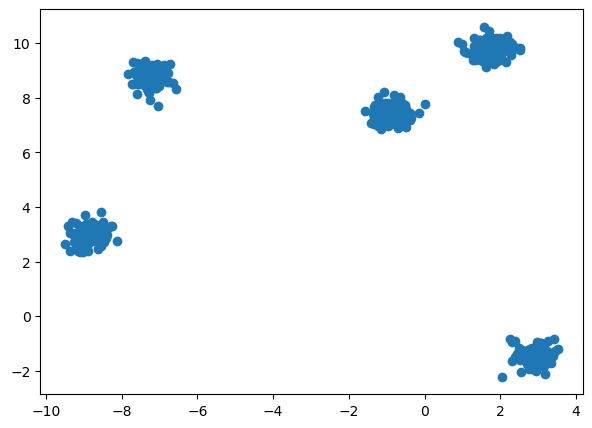

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1]);

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =3)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 2 0 0 2 1 1 2 0 2 0 2 2 1 2 0 2 2 2 0 1 0 2 0 0 2 1 0 2 0 1 0 2 0 2 2 0
 1 0 0 2 1 2 2 2 1 2 2 0 2 2 1 0 2 2 1 0 0 0 0 0 2 1 2 0 0 0 1 2 2 2 2 1 0
 0 0 1 0 2 2 2 0 2 0 0 0 1 2 1 0 2 0 0 1 1 2 2 0 1 0 2 1 1 0 1 0 0 1 1 2 0
 2 2 2 2 0 1 0 0 2 2 0 0 2 0 2 0 1 0 1 1 0 2 0 1 0 2 2 0 2 0 0 2 0 2 1 2 1
 0 2 2 2 2 2 1 1 2 1 2 2 2 0 2 0 2 0 0 0 2 0 1 1 0 1 0 1 1 2 1 0 2 0 1 0 2
 1 2 2 1 0 0 0 2 2 1 1 0 2 0 0 2 0 0 2 1 0 0 2 1 2 0 0 0 0 2 2 2 1 0 2 0 2
 2 0 1 2 2 2 2 0 0 2 0 1 2 0 0 1 1 0 0 2 0 0 2 2 0 2 1 0 2 2 0 0 2 2 2 0 0
 0 0 1 1 1 2 0 1 2 0 0 2 0 2 0 0 2 1 0 0 0 2 0 1 0 2 1 2 1 1 1 2 0 0 1 0 0
 0 0 1 0 0 2 2 0 2 2 0 2 0 2 2 2 0 0 2 2 0 0 0 2 2 2 2 0 0 2 2 1 2 1 2 2 0
 2 0 2 2 1 2 2 1 2 0 1 2 2 2 0 0 0 1 1 2 2 1 2 2 0 0 1 0 2 2 0 0 2 1 0 1 1
 1 2 0 2 2 0 2 0 0 0 0 0 2 1 0 2 0 2 0 2 0 2 1 2 2 0 2 0 2 0 2 1 0 1 0 1 0
 0 0 2 1 1 0 0 0 1 0 2 2 2 2 2 0 2 2 0 2 0 2 0 2 2 2 2 1 2 0 2 0 2 2 1 2 1
 2 0 0 0 0 2 0 2 1 1 2 2 0 1 0 1 2 1 0 2 0 0 0 0 2 0 2 0 0 2 2 0 2 2 1 2 1
 2 0 2 2 2 1 1 1 0 0 2 0 

In [ ]:
plt.

In [15]:
kmeans.cluster_centers_

array([[-8.06279872,  5.85810899],
       [ 2.87892914, -1.4554721 ],
       [ 0.41553574,  8.63873147]])

In [42]:
kmeans.inertia_

87.05661310253844

In [35]:
np.round(X,0)

array([[-7.,  3.],
       [ 1.,  5.],
       [ 1.,  5.],
       [ 8.,  6.],
       [ 1.,  5.],
       [ 6.,  4.],
       [ 1.,  5.],
       [ 8.,  6.],
       [ 1.,  5.],
       [-8.,  3.],
       [-4., -8.],
       [ 1.,  5.],
       [ 0.,  4.],
       [ 8.,  6.],
       [ 7.,  6.],
       [-6.,  3.],
       [ 5.,  5.],
       [ 6.,  5.],
       [-5., -7.],
       [ 6.,  5.],
       [ 0.,  5.],
       [ 7.,  6.],
       [-5., -3.],
       [-8.,  3.],
       [ 6.,  5.],
       [-7.,  3.],
       [-7.,  3.],
       [-5., -7.],
       [ 6.,  5.],
       [ 5.,  4.],
       [ 1.,  4.],
       [-5., -3.],
       [-5., -7.],
       [ 1.,  4.],
       [ 6.,  4.],
       [ 8.,  6.],
       [-5., -3.],
       [-7.,  3.],
       [-5., -3.],
       [-5., -7.],
       [ 5.,  4.],
       [-4., -7.],
       [ 8.,  6.],
       [ 6.,  4.],
       [-5., -7.],
       [ 6.,  5.],
       [ 7.,  6.],
       [ 1.,  4.],
       [-5., -3.],
       [-5., -7.],
       [-7.,  3.],
       [-4., -7.],
       [ 8.,

In [36]:
#?kmeans

In [37]:
X.shape

(500, 2)

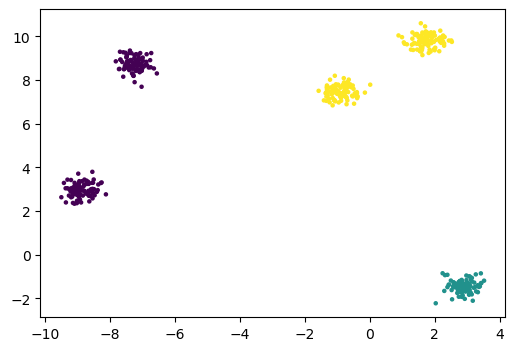

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=labels, s = 5)
plt.show()

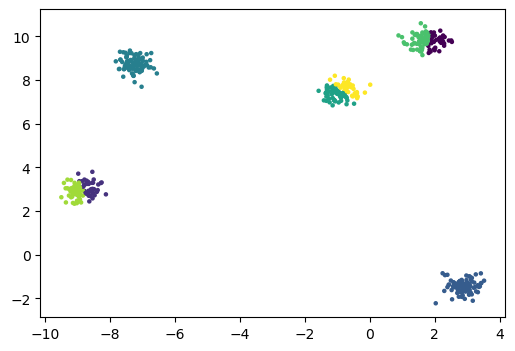

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=labels, s = 5)
plt.show()

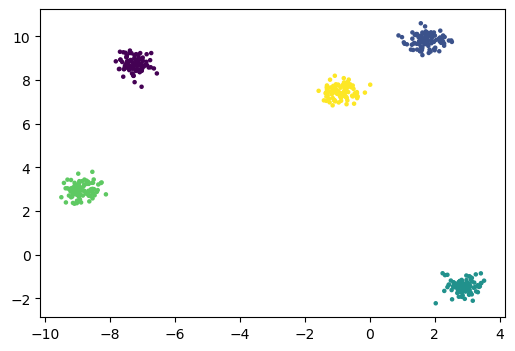

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=labels, s = 5)
plt.show()

In [17]:
import random
labels1 = []
for i in range(500):    
    labels1.append(random.randint(0,6))

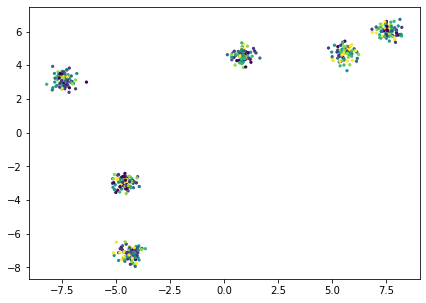

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels1, s = 5)
plt.show()

In [14]:
kmeans.inertia_

2493.468894099215

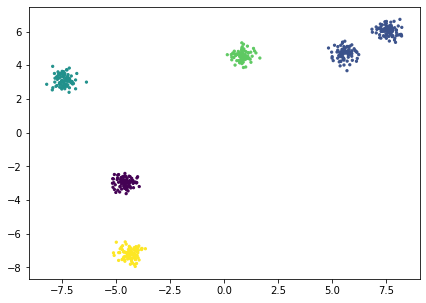

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=10000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels,s=5)
plt.show()

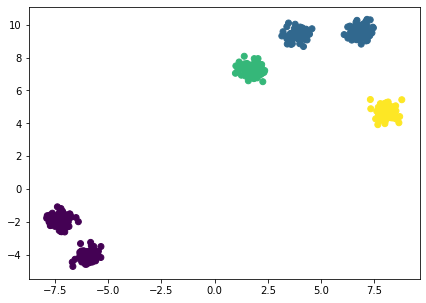

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=10000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

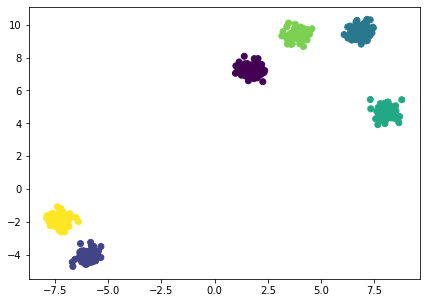

In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, max_iter=100000000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

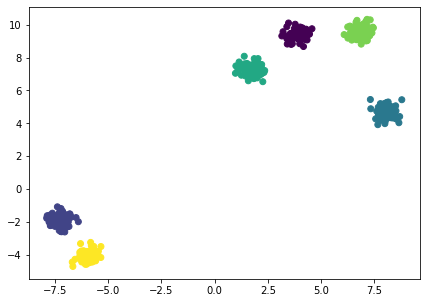

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, max_iter=10000000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [68]:
kmeans.inertia_

90.51781023743057

In [69]:
kmeans.cluster_centers_

array([[ 3.92923295,  9.38523106],
       [-7.2679147 , -1.86758211],
       [ 8.03643747,  4.69575002],
       [ 1.76043665,  7.26347663],
       [ 6.79640381,  9.59661672],
       [-5.93742738, -4.07232588]])

In [19]:
kmeansintertia = {}
for k in range(2, 80):
    kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=23082024)
    kmeans.fit(X)
    kmeansintertia[k] = kmeans.inertia_ 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [20]:
kmeansintertia

{2: 9690.885743788098,
 3: 2493.468894099215,
 4: 706.245530510965,
 5: 81.76875612197138,
 6: 75.32595809755715,
 7: 69.56140318084104,
 8: 62.91543545090658,
 9: 58.799664136954235,
 10: 52.61463254184647,
 11: 49.2961685253973,
 12: 45.640450771439376,
 13: 42.382168193393284,
 14: 39.02508152938433,
 15: 36.235044589936265,
 16: 33.08003158346875,
 17: 31.746718091118165,
 18: 30.190349938793105,
 19: 27.99030075602829,
 20: 26.302087363955476,
 21: 25.55956798289802,
 22: 24.061399811885416,
 23: 23.597121274957896,
 24: 22.588077626545317,
 25: 21.21463096008525,
 26: 21.054138771271525,
 27: 19.64860230438235,
 28: 19.3127694742317,
 29: 18.61437674241464,
 30: 17.85865519998398,
 31: 17.343196921646474,
 32: 16.890441025752164,
 33: 16.11981472505333,
 34: 16.034765311640793,
 35: 15.401949902752285,
 36: 14.89682384560153,
 37: 14.123880962326,
 38: 13.804807653473691,
 39: 13.358044909528411,
 40: 13.189028292747505,
 41: 12.826811263175998,
 42: 12.669609077765777,
 43: 12.1

In [21]:
#K-Means without the max iteration component
kmeansintertianew = {}
for k in range(78, 80):
    kmeans = KMeans(n_clusters=k, random_state=23082024)
    kmeans.fit(X)
    kmeansintertianew[k] = kmeans.inertia_ 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [23]:
kmeansintertianew

{78: 5.359592737972363, 79: 5.396386608531996}

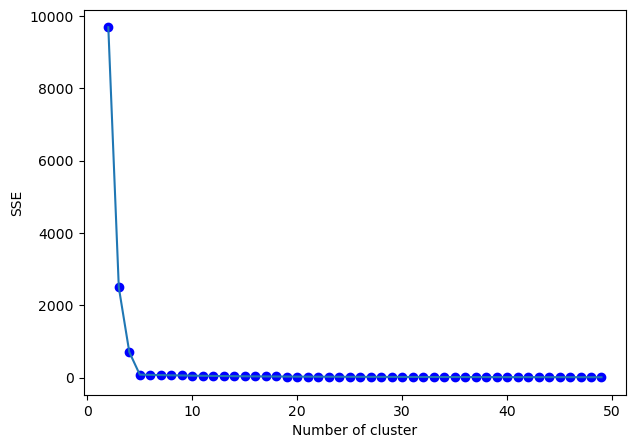

In [18]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(kmeansintertia.keys()), list(kmeansintertia.values()),'bo')
plt.plot(list(kmeansintertia.keys()), list(kmeansintertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [73]:
#?plt.plot

In [24]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 50):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

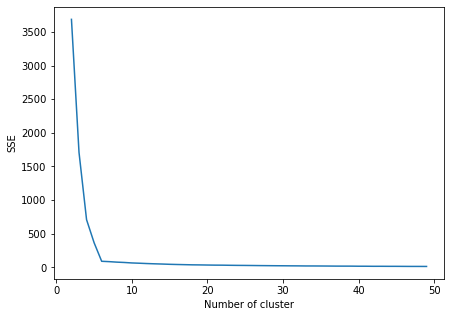

In [76]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [25]:
db

{2: 0.8440768347054858,
 3: 0.4424672931648194,
 4: 0.23982256994170081,
 5: 0.1456019976110631,
 6: 0.48166594688808656,
 7: 0.7116004314612976,
 8: 0.8768242199863037,
 9: 1.0030684865475827,
 10: 1.0042855866300795,
 11: 1.0966866270125821,
 12: 1.064662189837663,
 13: 0.9854809661756602,
 14: 0.9470045522172532,
 15: 0.942755671944576,
 16: 0.896594019256089,
 17: 0.8881416651511644,
 18: 0.9381132335340914,
 19: 0.8344734324071972,
 20: 0.8333784606737419,
 21: 0.8583005266117448,
 22: 0.8400020829684596,
 23: 0.8519955619570934,
 24: 0.8517521025298649,
 25: 0.8305467763499002,
 26: 0.8276753865771191,
 27: 0.791448259123582,
 28: 0.8119888246302718,
 29: 0.8100753512582188,
 30: 0.8169628449712271,
 31: 0.7907965685890265,
 32: 0.8001669250854886,
 33: 0.8075701753816577,
 34: 0.8245624646432228,
 35: 0.8364546789127293,
 36: 0.8049170388283894,
 37: 0.7771303961252258,
 38: 0.8330514756418367,
 39: 0.7919255616409027,
 40: 0.8074116727411568,
 41: 0.7855661666785771,
 42: 0.828

In [48]:
sse

{2: 7156.594804990909,
 3: 2931.0973220321553,
 4: 1079.0479659299458,
 5: 330.9833934878952,
 6: 87.05661310253844,
 7: 81.28559730472351,
 8: 74.99283538794643,
 9: 70.5479216291782,
 10: 65.08509304872237,
 11: 60.03251851398185,
 12: 56.27386661372039,
 13: 52.759068980882894,
 14: 49.398025866849984,
 15: 45.31919097992046,
 16: 43.06375774377806,
 17: 40.77106264651488,
 18: 38.02410750904011,
 19: 35.759246104561385,
 20: 33.91976349850714,
 21: 32.50803247749493,
 22: 30.891101555171566,
 23: 29.750344147809876,
 24: 28.568109222561176,
 25: 28.147208780469555,
 26: 26.333098615212734,
 27: 25.76393834674528,
 28: 24.998374810842446,
 29: 23.783820089843264,
 30: 22.951997076421,
 31: 22.050999017044287,
 32: 21.751507478410804,
 33: 21.081203623226028,
 34: 19.972520746349293,
 35: 19.425657202715648,
 36: 18.791245691620006,
 37: 18.173616010114408,
 38: 17.929777551490183,
 39: 17.219632618944274,
 40: 16.8528252380628,
 41: 16.27474010042986,
 42: 16.161449074332552,
 43: 1

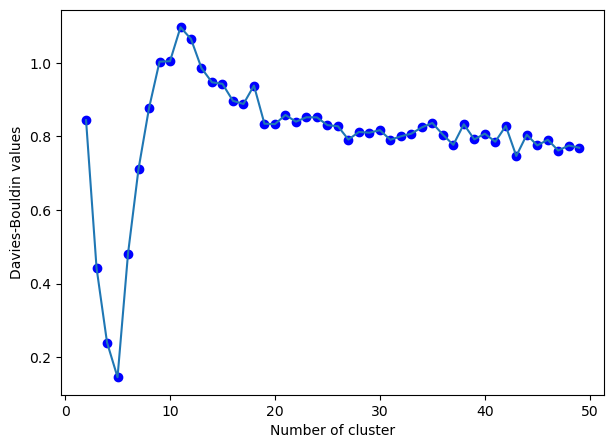

In [26]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'bo')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [80]:
#Accuracy metrics:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.352


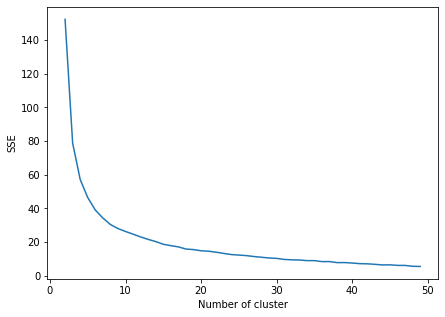

In [30]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

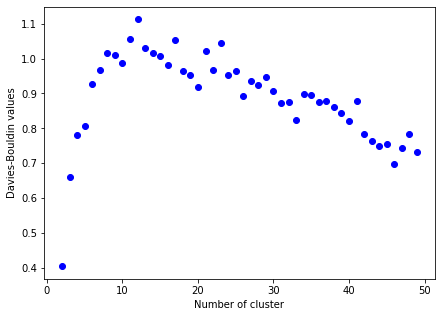

In [31]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'bo')
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()